In [30]:
import pandas as pd

import dtale
import dtale.app as dtale_app

### 啟動dtale

In [31]:
dtale_app.JUPYTER_SERVER_PROXY = True

dtale.show(pd.DataFrame([1,2,3]))

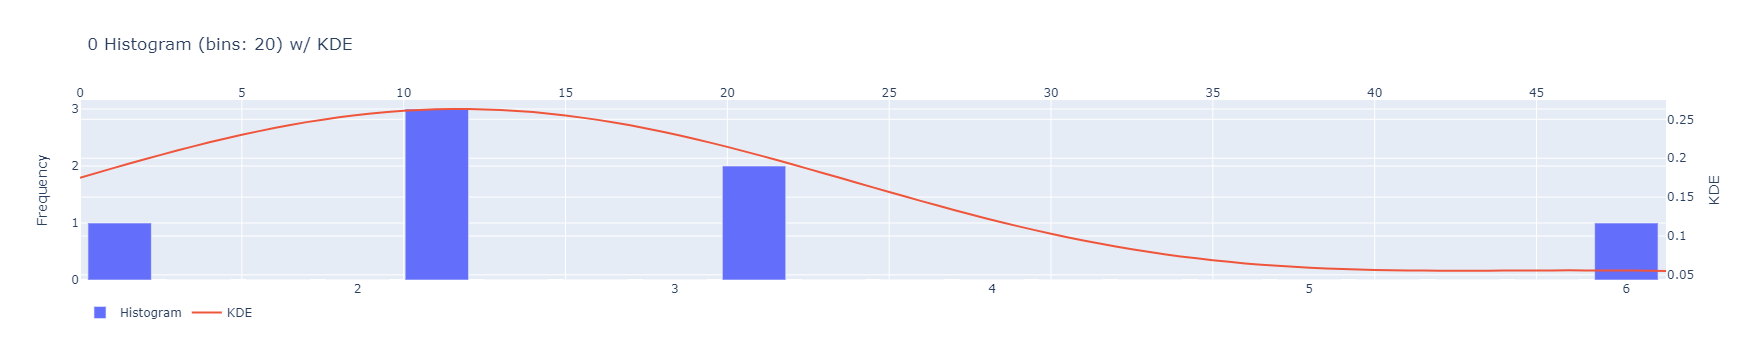

(Bar({
    'name': 'Histogram',
    'x': array([1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  ,
                4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  ]),
    'y': array([1, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)
}), Scatter({
    'line': {'shape': 'spline', 'smoothing': 0.3},
    'mode': 'lines',
    'name': 'KDE',
    'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
          20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
          38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
    'xaxis': 'x2',
    'y': array([0.17475809, 0.18687108, 0.19862763, 0.20986318, 0.2204128 , 0.230115  ,
                0.23881577, 0.24637255, 0.25265807, 0.25756387, 0.26100344, 0.26291481,
                0.26326248, 0.26203874, 0.25926415, 0.25498735, 0.24928408, 0.24225548,
                0.23402578, 0.22473933, 0.21455725, 0.20365357, 0.19221118, 0.18041756,
                0.16846046,

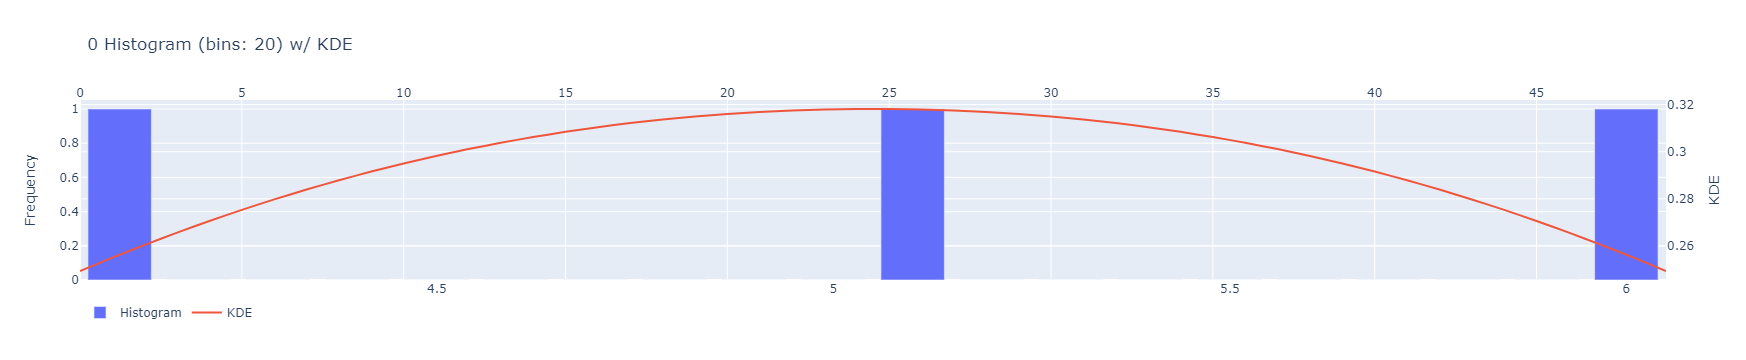

(Bar({
    'name': 'Histogram',
    'x': array([4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
                5.5, 5.6, 5.7, 5.8, 5.9, 6. ]),
    'y': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)
}), Scatter({
    'line': {'shape': 'spline', 'smoothing': 0.3},
    'mode': 'lines',
    'name': 'KDE',
    'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
          20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
          38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
    'xaxis': 'x2',
    'y': array([0.24934251, 0.25500273, 0.26043419, 0.26562892, 0.27058047, 0.27528386,
                0.2797355 , 0.28393313, 0.28787568, 0.2915632 , 0.29499671, 0.29817808,
                0.30110989, 0.30379528, 0.30623781, 0.30844134, 0.31040986, 0.31214737,
                0.31365779, 0.31494479, 0.31601173, 0.31686155, 0.31749668, 0.31791903,
                0.31812988, 0.31812988, 0.31791

In [28]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'


import pandas as pd


def HistogramCodeExport(df):

    # DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

    import numpy as np
    import pandas as pd
    import plotly.graph_objs as go

    if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
        df = df.to_frame(index=False)

    # remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
    df = df.reset_index().drop('index', axis=1, errors='ignore')
    df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

    s = df[~pd.isnull(df['0'])][['0']]
    chart, labels = np.histogram(s['0'], bins=20)
    import scipy.stats as sts
    kde = sts.gaussian_kde(s['0'])
    kde_data = kde.pdf(np.linspace(labels.min(), labels.max()))
    # main statistics
    stats = df['0'].describe().to_frame().T
    charts = [
        go.Bar(x=labels[1:], y=chart, name='Histogram'),
        go.Scatter(
            x=list(range(len(kde_data))), y=kde_data, name='KDE', yaxis='y2', xaxis='x2', line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
        )
    ]
    figure = go.Figure(data=charts, layout=go.Layout({
        'barmode': 'group',
        'legend': {'orientation': 'h'},
        'title': {'text': '0 Histogram (bins: 20) w/ KDE'},
        'xaxis2': {'anchor': 'y', 'overlaying': 'x', 'side': 'top'},
        'yaxis': {'side': 'left', 'title': {'text': 'Frequency'}},
        'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'KDE'}}
    }))

    # If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
    #
    # from plotly.offline import iplot, init_notebook_mode
    #
    # init_notebook_mode(connected=True)
    # for chart in charts:
    #     chart.pop('id', None) # for some reason iplot does not like 'id'
    # iplot(figure)
    # DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

    import numpy as np
    import pandas as pd
    import plotly.graph_objs as go

    if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
        df = df.to_frame(index=False)

    # remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
    df = df.reset_index().drop('index', axis=1, errors='ignore')
    df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

    s = df[~pd.isnull(df['0'])][['0']]
    chart, labels = np.histogram(s['0'], bins=20)
    import scipy.stats as sts
    kde = sts.gaussian_kde(s['0'])
    kde_data = kde.pdf(np.linspace(labels.min(), labels.max()))
    # main statistics
    stats = df['0'].describe().to_frame().T
    charts = [
        go.Bar(x=labels[1:], y=chart, name='Histogram'),
        go.Scatter(
            x=list(range(len(kde_data))), y=kde_data, name='KDE',		yaxis='y2', xaxis='x2',		line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
        )
    ]
    figure = go.Figure(data=charts, layout=go.Layout({
        'barmode': 'group',
        'legend': {'orientation': 'h'},
        'title': {'text': '0 Histogram (bins: 20) w/ KDE'},
        'xaxis2': {'anchor': 'y', 'overlaying': 'x', 'side': 'top'},
        'yaxis': {'side': 'left', 'title': {'text': 'Frequency'}},
        'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'KDE'}}
    }))

    # If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
    #
    # from plotly.offline import iplot, init_notebook_mode
    #
    # init_notebook_mode(connected=True)
    # for chart in charts:
    #     chart.pop('id', None) # for some reason iplot does not like 'id'
    # iplot(figure)
    return figure


dfs = [pd.DataFrame([1,6,2,3,2,3,2]), 
       pd.DataFrame([4,5,6])]


for df in dfs:
    fig = HistogramCodeExport(df)
    fig.show()
    print(fig.data)
    